In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2024-04-04 02:47:35.201673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 各パス指定 // Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定 // Classification number setting

In [3]:
NUM_CLASSES = 26

# 学習データ読み込み // Load learning data

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
# delimeter = angka dalam data dipisahkan oleh koma
# usecols = kolam mana yang harus dimuat,dalam hal ini dia merujuk dari 1 ke 42.

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築 // model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax') #output layer fungsi softmax
])

2024-04-04 02:47:56.121179: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック // Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル // model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練 // model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
74/74 [==============================] - ETA: 0s - loss: 3.2400 - accuracy: 0.0525
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
74/74 [==============================] - 2s 11ms/step - loss: 3.2400 - accuracy: 0.0525 - val_loss: 3.0809 - val_accuracy: 0.1148
Epoch 2/1000
68/74 [==========================>...] - ETA: 0s - loss: 2.9750 - accuracy: 0.1280
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
74/74 [==============================] - 0s 6ms/step - loss: 2.9573 - accuracy: 0.1308 - val_loss: 2.6341 - val_accuracy: 0.2153
Epoch 3/1000
72/74 [============================>.] - ETA: 0s - loss: 2.5488 - accuracy: 0.1916
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
74/74 [==============================] - 1s 10ms/step - loss: 2.5452 - accuracy: 0.1927 - val_loss: 2.1665 - val_accuracy: 0.3415
Epoch 4/1000
71/74 [===========================>..] - ETA: 0s - loss: 2.2325 - accuracy: 0.2504

In [13]:
# モデル評価 // model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

25/25 [==============================] - 0s 4ms/step - loss: 0.3089 - accuracy: 0.9039


In [14]:
# 保存したモデルのロード // Loading a saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# 推論テスト // Reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 66ms/step
[3.1171990e-12 5.2652137e-20 5.9812447e-11 1.7732224e-23 1.4531638e-13
 9.6487678e-21 1.8619406e-11 5.3091120e-16 1.6705606e-16 1.8002888e-03
 2.3274857e-19 8.9276538e-17 5.1455595e-13 8.1059963e-01 1.3248698e-02
 1.0089863e-12 4.4871729e-05 6.6766830e-08 1.5388671e-01 1.0430622e-02
 1.4390936e-06 5.3710319e-05 4.6168600e-05 4.9161366e-03 6.5605599e-07
 4.9709873e-03]
13


# 混同行列 // confusion matrix

99/99 [==============================] - 0s 4ms/step


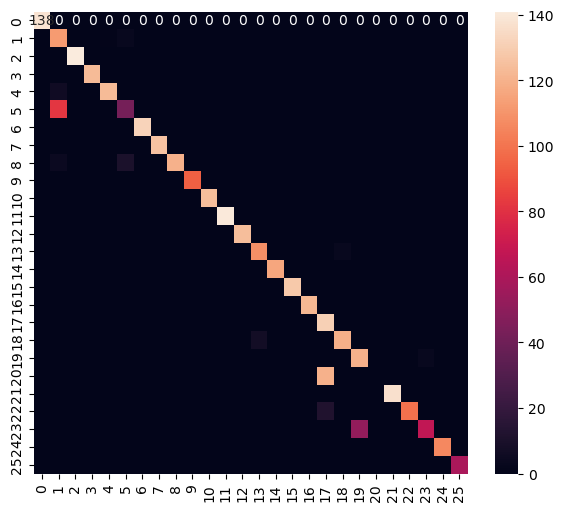

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       0.55      0.97      0.70       116
           2       1.00      1.00      1.00       141
           3       1.00      1.00      1.00       123
           4       0.99      0.95      0.97       129
           5       0.76      0.34      0.47       124
           6       1.00      1.00      1.00       132
           7       1.00      1.00      1.00       126
           8       1.00      0.90      0.94       134
           9       1.00      1.00      1.00        94
          10       1.00      1.00      1.00       124
          11       1.00      1.00      1.00       140
          12       1.00      1.00      1.00       124
          13       0.94      0.97      0.96       111
          14       1.00      1.00      1.00       116
          15       1.00      1.00      1.00       128
          16       1.00      1.00      1.00       122
     

/home/ubuntu/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換 // Convert to model for

In [17]:
# 推論専用のモデルとして保存 // Save as a model for inference only
model.save(model_save_path, include_optimizer=False)

In [18]:
# モデルを変換(量子化) // Transform the model (quantize)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

2024-04-04 02:51:06.638021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1' with dtype float and shape [?,42]
	 [[{{node input_1}}]]
2024-04-04 02:51:06.694033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,42]
	 [[{{node inputs}}]]
2024-04-04 02:51:06.710477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_1' with dtype float and shape [?,42]
	 [[{{node input_1}}]]
2024-04-04 02:5

INFO:tensorflow:Assets written to: /tmp/tmpg2jjzw6c/assets


INFO:tensorflow:Assets written to: /tmp/tmpg2jjzw6c/assets
2024-04-04 02:51:07.806001: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-04-04 02:51:07.806074: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-04-04 02:51:07.815191: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpg2jjzw6c
2024-04-04 02:51:07.818644: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-04-04 02:51:07.818687: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpg2jjzw6c
2024-04-04 02:51:07.828354: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-04-04 02:51:07.837500: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is n

7512

# 推論テスト // Reasoning test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [20]:
# 入出力テンソルを取得 // Get input/output tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施 // Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 278 µs, sys: 323 µs, total: 601 µs
Wall time: 510 µs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.1171925e-12 5.2651920e-20 5.9812440e-11 1.7732085e-23 1.4531663e-13
 9.6487662e-21 1.8619368e-11 5.3091115e-16 1.6705603e-16 1.8002887e-03
 2.3274851e-19 8.9276862e-17 5.1455585e-13 8.1059957e-01 1.3248703e-02
 1.0089861e-12 4.4871766e-05 6.6766823e-08 1.5388677e-01 1.0430631e-02
 1.4390989e-06 5.3710362e-05 4.6168643e-05 4.9161431e-03 6.5605593e-07
 4.9709892e-03]
13
